In [ ]:
import os
import cv2
import copy
import pandas as pd
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt
from glob import glob
from google.colab.patches import cv2_imshow
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import jaccard_score
from collections import Counter
import random
import torch
from sklearn import svm
from skimage.morphology import disk
from sklearn.preprocessing import StandardScaler
import torchvision
import torch.nn as nn
import torch.nn.functional as F
from torch.functional import Tensor
from scipy.ndimage.filters import median_filter
import torch.optim as optim
import torchvision.transforms as transforms
import itertools
import torchvision.datasets as datasets
from scipy.stats import kurtosis, skew
import torchvision.transforms.functional as TF
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from torch.utils.data import Dataset, DataLoader
from torch.nn.modules.activation import ReLU
from sklearn.metrics import classification_report, balanced_accuracy_score, cohen_kappa_score
from sklearn.linear_model import LogisticRegression
from scipy.stats import kurtosis, skew
from sklearn.ensemble import AdaBoostClassifier
from sklearn.multiclass import OneVsRestClassifier
import statistics
from statistics import mode
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedShuffleSplit
import seaborn as sns
from sklearn.feature_selection import SelectKBest, f_classif
import pickle
from torch.nn.modules.batchnorm import BatchNorm2d
import torch.optim as optim
from collections import Counter
from tqdm import tqdm
from google.colab import drive
import itertools
from pathlib import Path
from sklearn.utils import shuffle


In [ ]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
#Color Histograms
rf_colorh= pickle.load(open('/content/gdrive/MyDrive/Colab Notebooks/CAD Project/Dataset/Three Class Problem/Models/WP_Aug/ColorHistRF_model.sav', 'rb'))
gb_colorh= pickle.load(open('/content/gdrive/MyDrive/Colab Notebooks/CAD Project/Dataset/Three Class Problem/Models/WP_Aug/ColorHistGBoost_model.sav', 'rb'))
svm_colorh= pickle.load(open('/content/gdrive/MyDrive/Colab Notebooks/CAD Project/Dataset/Three Class Problem/Models/WP_Aug/ColorHistSVM_model.sav', 'rb'))

#Color statistics
rf_colors= pickle.load(open('/content/gdrive/MyDrive/Colab Notebooks/CAD Project/Dataset/Three Class Problem/Models/WP_Aug/ColorStatRF_model.sav', 'rb'))
svm_colors= pickle.load(open('/content/gdrive/MyDrive/Colab Notebooks/CAD Project/Dataset/Three Class Problem/Models/WP_Aug/ColorStatSVM_model.sav', 'rb'))
gb_colors= pickle.load(open('/content/gdrive/MyDrive/Colab Notebooks/CAD Project/Dataset/Three Class Problem/Models/WP_Aug/ColorStatGBoost_model.sav', 'rb'))

#GLCM texture
rf_glcm= pickle.load(open('/content/gdrive/MyDrive/Colab Notebooks/CAD Project/Dataset/Three Class Problem/Models/WP_Aug/GLCMRF_model.sav', 'rb'))
knn_glcm= pickle.load(open('/content/gdrive/MyDrive/Colab Notebooks/CAD Project/Dataset/Three Class Problem/Models/WP_Aug/GLCMKNN_model.sav', 'rb'))
gb_glcm= pickle.load(open('/content/gdrive/MyDrive/Colab Notebooks/CAD Project/Dataset/Three Class Problem/Models/WP_Aug/GLCMGBoost_model.sav', 'rb'))

#SIFT + BoW
rf_sift= pickle.load(open('/content/gdrive/MyDrive/Colab Notebooks/CAD Project/Dataset/Three Class Problem/Models/WP_Aug/SiftRF_model.sav', 'rb'))
svm_sift= pickle.load(open('/content/gdrive/MyDrive/Colab Notebooks/CAD Project/Dataset/Three Class Problem/Models/WP_Aug/SiftSVM_model.sav', 'rb'))
gb_sift= pickle.load(open('/content/gdrive/MyDrive/Colab Notebooks/CAD Project/Dataset/Three Class Problem/Models/WP_Aug/SiftGBoost_model.sav', 'rb'))

#LBP histograms
rf_lbph= pickle.load(open('/content/gdrive/MyDrive/Colab Notebooks/CAD Project/Dataset/Three Class Problem/Models/WP_Aug/LBPHRF_model.sav', 'rb'))
svm_lbph= pickle.load(open('/content/gdrive/MyDrive/Colab Notebooks/CAD Project/Dataset/Three Class Problem/Models/WP_Aug/LBPHSVM_model.sav', 'rb'))
gb_lbph= pickle.load(open('/content/gdrive/MyDrive/Colab Notebooks/CAD Project/Dataset/Three Class Problem/Models/WP_Aug/LBPHGBoost_model.sav', 'rb'))

In [ ]:
X_train= pickle.load(open('/content/gdrive/MyDrive/Colab Notebooks/CAD Project/Dataset/ThreeClassProblem_Data/X_train.p','rb'))
X_test= pickle.load(open('/content/gdrive/MyDrive/Colab Notebooks/CAD Project/Dataset/ThreeClassProblem_Data/X_val.p','rb'))
y_train= pickle.load(open('/content/gdrive/MyDrive/Colab Notebooks/CAD Project/Dataset/ThreeClassProblem_Data/y_train.p','rb'))
y_test= pickle.load(open('/content/gdrive/MyDrive/Colab Notebooks/CAD Project/Dataset/ThreeClassProblem_Data/y_val.p','rb'))

#Features: color histogram
X_train_ch= pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/CAD Project/Dataset/ThreeClassProblem_Data/Train_HistogramColorFeatures291022.csv')
X_test_ch= pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/CAD Project/Dataset/ThreeClassProblem_Data/Test_HistogramColorFeatures291022.csv')
scaler_ch= StandardScaler().fit(X_train_ch)
X_train_ch_scaled= scaler_ch.transform(X_train_ch)
X_test_ch_scaled= scaler_ch.transform(X_test_ch)

#Features: color statistics
X_train_cs= pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/CAD Project/Dataset/ThreeClassProblem_Data/Train_ColorFeatures291022.csv')
X_test_cs= pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/CAD Project/Dataset/ThreeClassProblem_Data/Test_ColorFeatures291022.csv')
scaler_cs= StandardScaler().fit(X_train_cs)
X_train_cs_scaled= scaler_cs.transform(X_train_cs)
X_test_cs_scaled= scaler_cs.transform(X_test_cs)

#Features: glcm
X_train_glcm= pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/CAD Project/Dataset/ThreeClassProblem_Data/Train_TextureFeatures291022.csv')
X_test_glcm= pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/CAD Project/Dataset/ThreeClassProblem_Data/Test_TextureFeatures291022.csv')
scaler_glcm= StandardScaler().fit(X_train_glcm)
X_train_glcm_scaled= scaler_glcm.transform(X_train_glcm)
X_test_glcm_scaled= scaler_glcm.transform(X_test_glcm)

#Features: LBP histograms
LBP_features1_train = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/CAD Project/Dataset/ThreeClassProblem_Data/LBP_features1_train_291022.csv')
LBP_features2_train = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/CAD Project/Dataset/ThreeClassProblem_Data/LBP_features2_train_291022.csv')
LBP_features3_train = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/CAD Project/Dataset/ThreeClassProblem_Data/LBP_LBP_features3_train_291022.csv')
LBP_histogram_features_train= pd.concat([LBP_features1_train, LBP_features2_train, LBP_features3_train], axis=1)
X_train_lbph= LBP_histogram_features_train
LBP_features1_test = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/CAD Project/Dataset/ThreeClassProblem_Data/LBP_features1_test_291022.csv')
LBP_features2_test = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/CAD Project/Dataset/ThreeClassProblem_Data/LBP_features2_test_291022.csv')
LBP_features3_test = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/CAD Project/Dataset/ThreeClassProblem_Data/LBP_features3_test_291022.csv')
LBP_histogram_features_test= pd.concat([LBP_features1_test, LBP_features2_test, LBP_features3_test], axis=1)
X_test_lbph= LBP_histogram_features_test
scaler_lbph= StandardScaler().fit(X_train_lbph)
X_train_lbph_scaled= scaler_lbph.transform(X_train_lbph)
X_test_lbph_scaled= scaler_lbph.transform(X_test_lbph)

#Features: SIFT + BoW
X_train_sift= pickle.load(open('/content/gdrive/MyDrive/Colab Notebooks/CAD Project/Dataset/Three Class Problem/Data/Pickles/train_features_wp.p','rb'))
X_test_sift= pickle.load(open('/content/gdrive/MyDrive/Colab Notebooks/CAD Project/Dataset/Three Class Problem/Data/Pickles/val_features_wp.p','rb'))
X_train_sift= pd.DataFrame(X_train_sift)
X_test_sift= pd.DataFrame(X_test_sift)
scaler_sift= StandardScaler().fit(X_train_sift)
X_train_sift_scaled= scaler_sift.transform(X_train_sift)
X_test_sift_scaled= scaler_sift.transform(X_test_sift)

In [ ]:
print(X_train_ch.shape)
print(X_train_cs.shape)
print(X_train_glcm.shape)
print(X_train_lbph.shape)
print(X_train_sift.shape)

(8058, 192)
(8058, 30)
(8058, 10)
(8058, 54)
(8058, 200)


In [ ]:
# X_train= pd.concat([X_train_ch, X_train_cs, X_train_glcm, X_train_lbph, X_train_sift],axis=1)
X_train= pd.concat([X_train_ch,  X_train_cs, X_train_glcm, X_train_lbph],axis=1)
X_train.columns=[x for x in range(len(X_train.columns))]
# X_test= pd.concat([X_test_ch, X_test_cs, X_test_glcm,X_test_lbph, X_test_sift],axis=1)
X_test= pd.concat([X_test_ch, X_test_cs, X_test_glcm, X_test_lbph],axis=1)
X_test.columns=[y for y in range(len(X_test.columns))]
scaler= StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled= scaler.transform(X_test)

First model: SVM

In [ ]:
model1= svm.SVC()
model1.fit(X_train_scaled,y_train)
y_pred1= model1.predict(X_test_scaled)

In [ ]:
print(classification_report(y_test,y_pred1))
print(balanced_accuracy_score(y_test,y_pred1))
print("Kappa Score :")
print(cohen_kappa_score(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.88      0.80      0.84       678
           1       0.70      0.85      0.77       498
           2       0.26      0.15      0.19        94

    accuracy                           0.77      1270
   macro avg       0.62      0.60      0.60      1270
weighted avg       0.77      0.77      0.76      1270

0.6005866181099216
Kappa Score :
0.5883061585261893


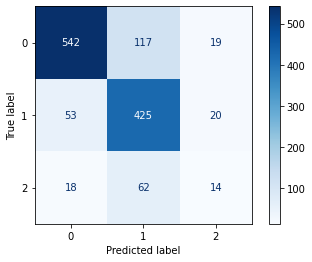

In [ ]:
cm= confusion_matrix(y_test,y_pred1,labels= model1.classes_)
disp= ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model1.classes_)
disp= disp.plot(include_values= True, cmap=plt.cm.Blues)
plt.grid(False)
plt.show()

Second Model: Logistic Regression

In [ ]:
model2= LogisticRegression(max_iter=2000)
model2.fit(X_train_scaled,y_train)
y_pred2= model2.predict(X_test_scaled)

In [ ]:
print(classification_report(y_test,y_pred2))
print(balanced_accuracy_score(y_test,y_pred2))
print("Kappa Score :")
print(cohen_kappa_score(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.84      0.79      0.81       678
           1       0.70      0.83      0.76       498
           2       0.27      0.14      0.18        94

    accuracy                           0.75      1270
   macro avg       0.60      0.58      0.58      1270
weighted avg       0.74      0.75      0.74      1270

0.5837365655429098
Kappa Score :
0.5525624000650424


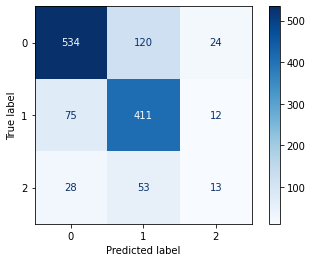

In [ ]:
cm= confusion_matrix(y_test,y_pred2,labels= model2.classes_)
disp= ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model2.classes_)
disp= disp.plot(include_values= True, cmap=plt.cm.Blues)
plt.grid(False)
plt.show()

Third model: Gradient Boosting

In [ ]:
model3= GradientBoostingClassifier(random_state=42)
model3.fit(X_train_scaled,y_train)
y_pred3= model3.predict(X_test_scaled)

In [ ]:
print(classification_report(y_test,y_pred3))
print(balanced_accuracy_score(y_test,y_pred3))
print("Kappa Score :")
print(cohen_kappa_score(y_test,y_pred3))

              precision    recall  f1-score   support

           0       0.85      0.79      0.82       678
           1       0.70      0.82      0.76       498
           2       0.20      0.12      0.15        94

    accuracy                           0.75      1270
   macro avg       0.58      0.58      0.57      1270
weighted avg       0.74      0.75      0.75      1270

0.5764252012128096
Kappa Score :
0.5524443243486681


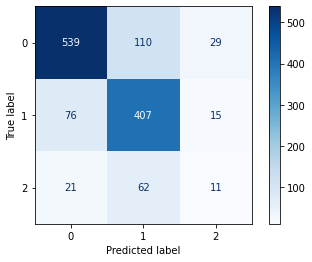

In [ ]:
cm= confusion_matrix(y_test,y_pred3,labels= model3.classes_)
disp= ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model3.classes_)
disp= disp.plot(include_values= True, cmap=plt.cm.Blues)
plt.grid(False)
plt.show()

Fourth Model: Random Forest Classifier

In [ ]:
model4= RandomForestClassifier(random_state=42)
model4.fit(X_train_scaled,y_train)
y_pred4= model4.predict(X_test_scaled)

In [ ]:
print(classification_report(y_test,y_pred4))
print(balanced_accuracy_score(y_test,y_pred4))
print("Kappa Score :")
print(cohen_kappa_score(y_test,y_pred4))

              precision    recall  f1-score   support

           0       0.88      0.85      0.86       678
           1       0.76      0.86      0.81       498
           2       0.46      0.23      0.31        94

    accuracy                           0.81      1270
   macro avg       0.70      0.65      0.66      1270
weighted avg       0.80      0.81      0.80      1270

0.6479932155660866
Kappa Score :
0.6497176039008798


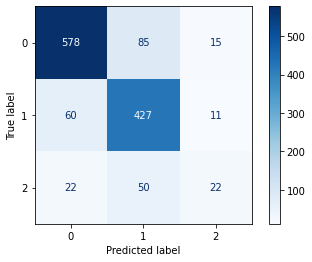

In [ ]:
cm= confusion_matrix(y_test,y_pred4,labels= model4.classes_)
disp= ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model4.classes_)
disp= disp.plot(include_values= True, cmap=plt.cm.Blues)
plt.grid(False)
plt.show()

Fifth model: AdaBoost classifier

In [ ]:
model5= AdaBoostClassifier(random_state=42)
model5.fit(X_train_scaled,y_train)
y_pred5= model5.predict(X_test_scaled)

In [ ]:
print(classification_report(y_test,y_pred5))
print(balanced_accuracy_score(y_test,y_pred5))
print("Kappa Score :")
print(cohen_kappa_score(y_test,y_pred5))

              precision    recall  f1-score   support

           0       0.78      0.77      0.77       678
           1       0.66      0.69      0.67       498
           2       0.14      0.12      0.13        94

    accuracy                           0.69      1270
   macro avg       0.53      0.53      0.52      1270
weighted avg       0.68      0.69      0.69      1270

0.5250515650753393
Kappa Score :
0.4381742403147427


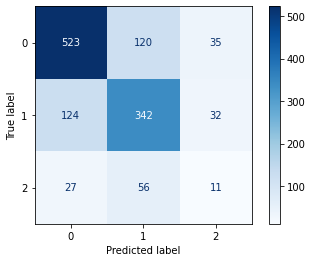

In [ ]:
cm= confusion_matrix(y_test,y_pred5,labels= model5.classes_)
disp= ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model5.classes_)
disp= disp.plot(include_values= True, cmap=plt.cm.Blues)
plt.grid(False)
plt.show()

Sixth Model: Decision Trees Classifier

In [ ]:
model6= DecisionTreeClassifier(random_state=42)
model6.fit(X_train_scaled,y_train)
y_pred6= model6.predict(X_test_scaled)

In [ ]:
print(classification_report(y_test,y_pred6))
print(balanced_accuracy_score(y_test,y_pred6))
print("Kappa Score :")
print(cohen_kappa_score(y_test,y_pred6))

              precision    recall  f1-score   support

           0       0.82      0.78      0.80       678
           1       0.71      0.67      0.69       498
           2       0.21      0.35      0.26        94

    accuracy                           0.71      1270
   macro avg       0.58      0.60      0.59      1270
weighted avg       0.73      0.71      0.72      1270

0.601330193680011
Kappa Score :
0.4895080327776987


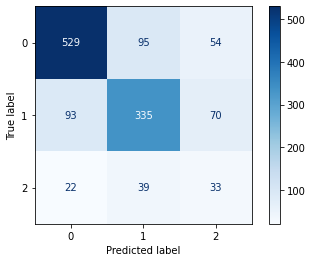

In [ ]:
cm= confusion_matrix(y_test,y_pred6,labels= model6.classes_)
disp= ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model6.classes_)
disp= disp.plot(include_values= True, cmap=plt.cm.Blues)
plt.grid(False)
plt.show()

Seventh model: XGBoost Classifier

In [ ]:
model7= XGBClassifier(random_state=42)
model7.fit(X_train_scaled,y_train)
y_pred7= model7.predict(X_test_scaled)

In [ ]:
print(classification_report(y_test,y_pred7))
print(balanced_accuracy_score(y_test,y_pred7))
print("Kappa Score :")
print(cohen_kappa_score(y_test,y_pred7))

              precision    recall  f1-score   support

           0       0.84      0.79      0.81       678
           1       0.70      0.81      0.75       498
           2       0.18      0.11      0.13        94

    accuracy                           0.75      1270
   macro avg       0.57      0.57      0.57      1270
weighted avg       0.74      0.75      0.74      1270

0.56872679949699
Kappa Score :
0.5410279388982959


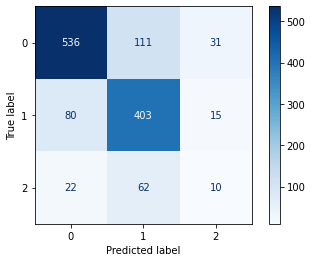

In [ ]:
cm= confusion_matrix(y_test,y_pred7,labels= model7.classes_)
disp= ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model7.classes_)
disp= disp.plot(include_values= True, cmap=plt.cm.Blues)
plt.grid(False)
plt.show()

Eigth model: Naive Bayes Classifier

In [ ]:
model8= GaussianNB()
model8.fit(X_train_scaled,y_train)
y_pred8= model8.predict(X_test_scaled)

In [ ]:
print(classification_report(y_test,y_pred8))
print(balanced_accuracy_score(y_test,y_pred8))
print("Kappa Score :")
print(cohen_kappa_score(y_test,y_pred8))

              precision    recall  f1-score   support

           0       0.64      0.78      0.70       678
           1       0.65      0.51      0.57       498
           2       0.07      0.03      0.04        94

    accuracy                           0.62      1270
   macro avg       0.45      0.44      0.44      1270
weighted avg       0.60      0.62      0.60      1270

0.4435439618260905
Kappa Score :
0.2833565016610513


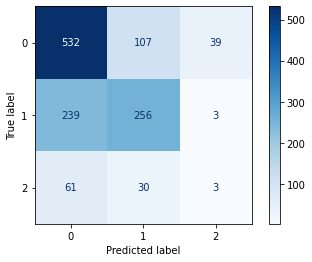

In [ ]:
cm= confusion_matrix(y_test,y_pred8,labels= model8.classes_)
disp= ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model8.classes_)
disp= disp.plot(include_values= True, cmap=plt.cm.Blues)
plt.grid(False)
plt.show()

Ninth Model: KNeighbors Classifier

In [ ]:
model9= KNeighborsClassifier()
model9.fit(X_train_scaled,y_train)
y_pred9= model9.predict(X_test_scaled)


In [ ]:
print(classification_report(y_test,y_pred9))
print(balanced_accuracy_score(y_test,y_pred9))
print("Kappa Score :")
print(cohen_kappa_score(y_test,y_pred9))

              precision    recall  f1-score   support

           0       0.85      0.81      0.83       678
           1       0.73      0.78      0.76       498
           2       0.34      0.34      0.34        94

    accuracy                           0.76      1270
   macro avg       0.64      0.64      0.64      1270
weighted avg       0.77      0.76      0.76      1270

0.6434475742674457
Kappa Score :
0.5764302556465624


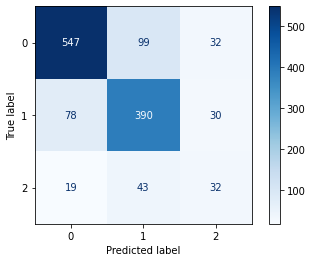

In [ ]:
cm= confusion_matrix(y_test,y_pred9,labels= model9.classes_)
disp= ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model9.classes_)
disp= disp.plot(include_values= True, cmap=plt.cm.Blues)
plt.grid(False)
plt.show()

Tenth Model: Bagging Classifier

In [ ]:
model10= BaggingClassifier(base_estimator=RandomForestClassifier(random_state=42),n_estimators=10,random_state=42)
model10.fit(X_train_scaled,y_train)
y_pred10= model10.predict(X_test_scaled)


In [ ]:
print(classification_report(y_test,y_pred10))
print(balanced_accuracy_score(y_test,y_pred10))
print("Kappa Score :")
print(cohen_kappa_score(y_test,y_pred10))

              precision    recall  f1-score   support

           0       0.87      0.83      0.85       678
           1       0.75      0.85      0.80       498
           2       0.33      0.19      0.24        94

    accuracy                           0.79      1270
   macro avg       0.65      0.62      0.63      1270
weighted avg       0.78      0.79      0.78      1270

0.6247400951323022
Kappa Score :
0.6211850733722302


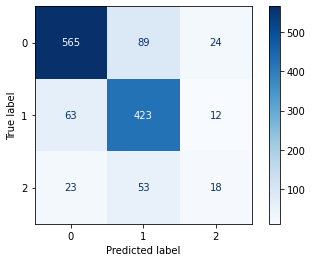

In [ ]:
cm= confusion_matrix(y_test,y_pred10,labels= model10.classes_)
disp= ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model10.classes_)
disp= disp.plot(include_values= True, cmap=plt.cm.Blues)
plt.grid(False)
plt.show()

Eleventh Model: Stacking Classifier

In [ ]:
def get_stack_model():
  level0 = list()
  level0.append(('lr', LogisticRegression(max_iter=2000,random_state=42)))
  level0.append(('knn', KNeighborsClassifier()))
  level0.append(('cart', DecisionTreeClassifier(random_state=42)))
  level0.append(('svm', svm.SVC(kernel='rbf', gamma='auto',decision_function_shape='ovr', random_state=42)))
  level0.append(('bayes', GaussianNB()))
  level0.append(('gboosting', GradientBoostingClassifier(random_state=42)))
  level0.append(('rforest', RandomForestClassifier(random_state=42)))
  level0.append(('adaboost', AdaBoostClassifier(random_state=42)))
  level1 = LogisticRegression(max_iter=2000,random_state=42)
  model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
  return model

In [ ]:
model11=get_stack_model()
model11.fit(X_train_scaled,y_train)
y_pred11= model11.predict(X_test_scaled)

In [ ]:
print(classification_report(y_test,y_pred11))
print(balanced_accuracy_score(y_test,y_pred11))
print("Kappa Score :")
print(cohen_kappa_score(y_test,y_pred11))

              precision    recall  f1-score   support

           0       0.90      0.88      0.89       678
           1       0.79      0.88      0.83       498
           2       0.55      0.28      0.37        94

    accuracy                           0.84      1270
   macro avg       0.75      0.68      0.70      1270
weighted avg       0.83      0.84      0.83      1270

0.6795509408499497
Kappa Score :
0.6996639182853011


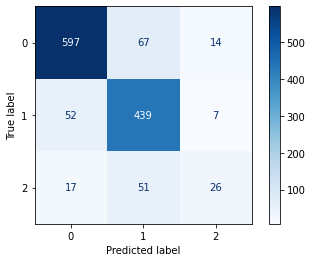

In [ ]:
cm= confusion_matrix(y_test,y_pred11,labels= model11.classes_)
disp= ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model11.classes_)
disp= disp.plot(include_values= True, cmap=plt.cm.Blues)
plt.grid(False)
plt.show()

Twelveth model

In [ ]:
def get_stack_model():
  level0 = list()
  level0.append(('lr', LogisticRegression(max_iter=2000,random_state=42)))
  level0.append(('knn', KNeighborsClassifier()))
  level0.append(('cart', DecisionTreeClassifier(random_state=42)))
  level0.append(('svm', svm.SVC(kernel='rbf', gamma='auto',decision_function_shape='ovr', random_state=42)))
  level0.append(('bayes', GaussianNB()))
  level0.append(('xgboost', XGBClassifier(random_state=42)))
  level0.append(('gboosting', GradientBoostingClassifier(random_state=42)))
  level0.append(('rforest', RandomForestClassifier(random_state=42)))
  level0.append(('adaboost', AdaBoostClassifier(random_state=42)))
  level1 = LogisticRegression(max_iter=2000,random_state=42)
  model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
  return model

In [ ]:
model12=get_stack_model()
model12.fit(X_train_scaled,y_train)
y_pred12= model12.predict(X_test_scaled)

In [ ]:
print(classification_report(y_test,y_pred12))
print(balanced_accuracy_score(y_test,y_pred12))
print("Kappa Score :")
print(cohen_kappa_score(y_test,y_pred11))

              precision    recall  f1-score   support

           0       0.89      0.88      0.89       678
           1       0.79      0.88      0.83       498
           2       0.55      0.28      0.37        94

    accuracy                           0.83      1270
   macro avg       0.74      0.68      0.70      1270
weighted avg       0.83      0.83      0.83      1270

0.6783899547225493
Kappa Score :
0.6996639182853011


In [ ]:
def feature_selection(X_train,y_train,X_test,k):
  best_features= SelectKBest(score_func= f_classif,k=k )
  best_features.fit(X_train,y_train)
  X_train_new= best_features.transform(X_train)
  X_test_new= best_features.transform(X_test)
  return X_train_new,X_test_new,best_features

In [ ]:
for i in range(1,X_train_scaled.shape[1]+1):
  X_train_new, X_test_new, best_features= feature_selection(X_train_scaled, y_train, X_test_scaled, i)
  model= svm.SVC()
  model.fit(X_train_new,y_train)
  y_pred= model.predict(X_test_new)
  acc= cohen_kappa_score(y_test,y_pred)
  print('Cohen Kappa Score %.2f' % (acc*100),'selecting',i,'best features')

Cohen Kappa Score -3.59 selecting 1 best features
Cohen Kappa Score 15.71 selecting 2 best features
Cohen Kappa Score 19.20 selecting 3 best features
Cohen Kappa Score 24.31 selecting 4 best features
Cohen Kappa Score 25.75 selecting 5 best features
Cohen Kappa Score 31.53 selecting 6 best features
Cohen Kappa Score 34.94 selecting 7 best features
Cohen Kappa Score 34.24 selecting 8 best features
Cohen Kappa Score 33.85 selecting 9 best features
Cohen Kappa Score 35.21 selecting 10 best features
Cohen Kappa Score 36.36 selecting 11 best features
Cohen Kappa Score 36.53 selecting 12 best features
Cohen Kappa Score 38.55 selecting 14 best features
Cohen Kappa Score 39.30 selecting 15 best features
Cohen Kappa Score 39.36 selecting 16 best features
Cohen Kappa Score 38.66 selecting 17 best features
Cohen Kappa Score 38.12 selecting 18 best features
Cohen Kappa Score 39.02 selecting 19 best features
Cohen Kappa Score 38.46 selecting 20 best features
Cohen Kappa Score 39.51 selecting 21 bes

Thirteenth model

In [ ]:
def get_stack_model():
  level0 = list()
  level0.append(('svm', svm.SVC(kernel='rbf', gamma='auto',decision_function_shape='ovr', random_state=42)))
  level0.append(('xgboost', XGBClassifier(random_state=42)))
  level0.append(('gboosting', GradientBoostingClassifier(random_state=42)))
  level0.append(('rforest', RandomForestClassifier(random_state=42)))
  level1 = LogisticRegression(max_iter=2000,random_state=42)
  model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
  return model

In [ ]:
model13=get_stack_model()
model13.fit(X_train_scaled,y_train)
y_pred13= model13.predict(X_test_scaled)

In [ ]:
print(classification_report(y_test,y_pred13))
print(balanced_accuracy_score(y_test,y_pred13))
print("Kappa Score :")
print(cohen_kappa_score(y_test,y_pred13))

              precision    recall  f1-score   support

           0       0.88      0.86      0.87       678
           1       0.77      0.87      0.81       498
           2       0.52      0.23      0.32        94

    accuracy                           0.82      1270
   macro avg       0.72      0.65      0.67      1270
weighted avg       0.81      0.82      0.81      1270

0.6531288021602509
Kappa Score :
0.6614135908525387


Fourteenth Model

In [ ]:
def get_stack_model():
  level0 = list()
  level0.append(('lr', LogisticRegression(max_iter=2000,random_state=42)))
  level0.append(('knn', KNeighborsClassifier()))
  level0.append(('svm', svm.SVC(kernel='rbf', gamma='auto',decision_function_shape='ovr', random_state=42)))
  level0.append(('xgboost', XGBClassifier(random_state=42)))
  level0.append(('gboosting', GradientBoostingClassifier(random_state=42)))
  level0.append(('rforest', RandomForestClassifier(random_state=42)))
  level1 = LogisticRegression(max_iter=2000,random_state=42)
  model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
  return model

In [ ]:
model14=get_stack_model()
model14.fit(X_train_scaled,y_train)
y_pred14= model14.predict(X_test_scaled)

In [ ]:
print(classification_report(y_test,y_pred14))
print(balanced_accuracy_score(y_test,y_pred14))
print("Kappa Score :")
print(cohen_kappa_score(y_test,y_pred14))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89       678
           1       0.79      0.88      0.83       498
           2       0.62      0.30      0.40        94

    accuracy                           0.84      1270
   macro avg       0.77      0.69      0.71      1270
weighted avg       0.83      0.84      0.83      1270

0.6879403637269217
Kappa Score :
0.7061927337375211
